# Grammar dependency notebook
Authors
https://towardsdatascience.com/natural-language-processing-dependency-parsing-cf094bbbe3f7

In [1]:
# !curl https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip -o stanford-corenlp-4.2.2.zip 
# !curl https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2-models-english.jar -o stanford-corenlp-4.2.2-models-english.jar
# !7z x stanford-corenlp-4.2.2.zip # windows
# !unzip stanford-corenlp-4.2.2.zip# mac / linux

In [2]:
# https://web.stanford.edu/~jurafsky/slp3/14.pdf
# https://stanfordnlp.github.io/CoreNLP/index.html    
from nltk.parse import DependencyGraph,ProjectiveDependencyParser,NonprojectiveDependencyParser
from nltk import word_tokenize
from nltk.parse.stanford import StanfordDependencyParser
from nltk.parse.corenlp import CoreNLPServer
import tqdm

In [3]:
# Paths to CoreNLP jar unzipped and model jar
jar_path = 'stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'
models_jar_path = 'stanford-corenlp-4.2.2-models-english.jar'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
text = 'The monkey is in the tree'

result = parser.raw_parse(text)
dependency = result.__next__() #bad API

C:\Users\miqut\AppData\Local\Temp/ipykernel_1956/2713526123.py:6: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


In [4]:
print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
    print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
tree            | NN         | nsubj      | monkey          | NN        
monkey          | NN         | det        | The             | DT        
tree            | NN         | cop        | is              | VBZ       
tree            | NN         | case       | in              | IN        
tree            | NN         | det        | the             | DT        


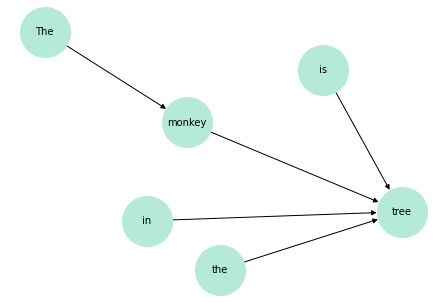

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = dependency.nx_graph()

words = text.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

In [6]:
# my contribution

In [7]:
# https://networkx.org/documentation/stable/index.html
    
G = nx.Graph(G)
centrality = nx.betweenness_centrality(G)
print(centrality)

print("-"*60)
for key in centrality:
    print ("{:<10}|{:<10}".format(labels[key],str(centrality[key])))

{1: 0.0, 2: 0.4, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.9}
------------------------------------------------------------
The       |0.0       
monkey    |0.4       
is        |0.0       
in        |0.0       
the       |0.0       
tree      |0.9       


# Activity

The grammatical complexity of a text can be determined by the degree of dependency between words in the same sentence. Any suggestions on how to calculate a footprint/spectrum of this?

La complejidad gramatical de un texto se puede determinar por el grado de dependencia entre palabras de una misma sentencia. ¿alguna sugerencia de como poder calcular una huella/un espectro de esto?


shall we implement it?

In [45]:
import re
import functools

romeojulieta = open('romeojulieta.txt','r')
text = romeojulieta.read()
romeojulietaSentences = re.split(r'(\.\W|\n{2,})', text) # may create empty elements
romeojulietaSentences = list(filter(lambda sentence: not re.match(r'^\W*$', sentence), romeojulietaSentences)) # remove empty elements
romeojulietaSentences = list(filter(lambda sentence: not re.match(r'^\w+$', sentence), romeojulietaSentences)) # remove one word elements

romeojulietaCleanSentences = list(map(lambda sentence: re.sub(r'((\W(?!(\w)))+.|\n+)', " ", sentence).lower(), romeojulietaSentences))
for sentence in romeojulietaCleanSentences[0:5]:
  print(sentence)

the project gutenberg ebook of romeo and juliet by william shakespeare
this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever
you may copy it give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org
if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook
 title romeo and juliet


In [50]:
def getValues(dict):
  values = []
  for k,v in dict.items():
    values.append(v)
  return values

def calculateListAverage(list):
    return sum(list) / len(list)

def calculateDependencyDegree(text):
  result = parser.raw_parse(text)
  graph = nx.Graph(result.__next__().nx_graph())
  centrality = nx.betweenness_centrality(graph)
  values = getValues(centrality)
  return calculateListAverage(values)

In [54]:

averages = []
for sentence in tqdm.tqdm(romeojulietaCleanSentences[0:50]):
  degree = calculateDependencyDegree(sentence)
  averages.append(degree)

print(calculateListAverage(averages))

100%|██████████| 50/50 [00:55<00:00,  1.11s/it]

0.15418959303786886
